Name: Chanyu Choung

Class: CMP414

Homework due date: May 26th, 2021 (Wednesday)

Homework: Final Project

**Choice  2: Classification on the Telco-Churn Dataset**

The dataset and its description is available at Kaggle. The goal of this task is to analyze the behavior of telecom customers and understand what factors are important to retain customers.

1. Visualize the univariate distribution of each input variable and the target variable “churn”.

2. Split data into training and test sets. Convert each categorical variable into numerical variables using one-hot-encoding.

3. Evaluate the following classification models:

a. Logistic Regression

b. Support Vector Machine

c. K Nearest Neighbors

d. Decision Trees

e. Random Forests

Note that you need to decide the choice of hyper-parameters for the models, such as the value of k for k nearest neighbor method and the maximum depth for the random forest method.

4. Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.

5. Which types of customers are less likely to end the service? 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/cchanyu/MachineLearning/main/SheetData/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=',')
print(data.shape)
print(data.head())

(7043, 21)
   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


In [ ]:
column = ["PaymentMethod", "InternetService", "Dependents", "PhoneService", "MultipleLines", "DeviceProtection", "StreamingTV", "StreamingMovies",
          "SeniorCitizen", "gender", "Partner", "TechSupport", "OnlineBackup", "OnlineSecurity", "PaperlessBilling", "Contract", "tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
from sklearn.preprocessing import LabelEncoder

feature_names = []
label_encoders = {}
for feature in column + [target]:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])
    names = label_encoders[feature].classes_.tolist()
    if feature == target:
        continue
    feature_names.extend([feature + '_' + str(name) for name in names])

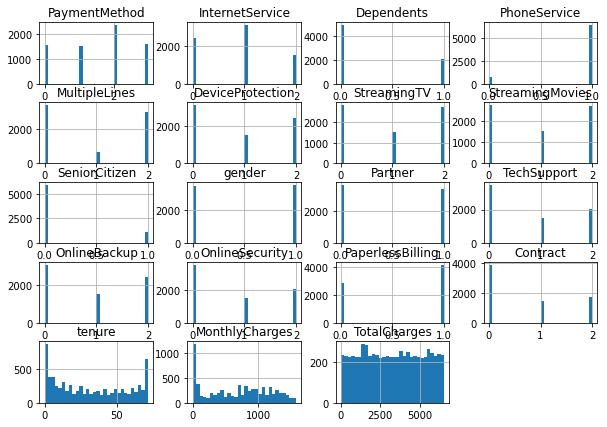

In [ ]:
filter = data.TotalCharges == " "
data = data[~filter]

data.TotalCharges = pd.to_numeric(data.TotalCharges)
data[column].hist(bins=30, figsize=(10, 7));

In [ ]:
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(data, test_size=0.2)
test_data = test_data.copy()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC

model_log = LogisticRegression(solver='lbfgs', penalty='l2', C=.3, max_iter = 1000)
model_svc = SVC(C=10, kernel='rbf', degree=2, coef0=0)
model_knn = KNeighborsClassifier(n_neighbors=26)
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=6, random_state=42)
model_rf = RandomForestClassifier(criterion='gini', n_estimators=1234, max_features='sqrt', max_depth=14, n_jobs=-1)

param_grid_log = {'penalty': ['l2'], 'C':  np.arange(.1, 3, .1)}
param_grid_svc = {'C': np.arange(.1, 3, .1)}
param_grid_knn = {'n_neighbors': np.arange(1, 30)}
param_grid_tree = {'criterion':['gini','entropy'],
                   'max_depth': np.arange(1,10),
                   'min_samples_split': np.arange(2,10),
                   'min_samples_leaf': np.arange(2,5)}
param_grid_RF = {'n_estimators': np.arange(10, 2000),
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

def buildModel (model, tag, param):
    if tag == 'cv_rf':
        cv = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, verbose=0)
    else:
        cv = GridSearchCV(model, param, cv=5)
    cv.fit(training_data.loc[:, column], training_data['Churn'])
    print(tag,":", cv.best_params_)
    
    model.fit(training_data.loc[:, column], training_data['Churn'])
    print(cross_val_score(model, training_data[column], training_data['Churn'], cv=5))
    pred = model.predict(test_data.loc[:, column])
    return pred

p_log = buildModel(model_log, 'cv_log', param_grid_log)
p_svc = buildModel(model_svc, 'cv_svc', param_grid_svc)
p_knn = buildModel(model_knn,'cv_knn', param_grid_knn)
p_tree = buildModel(model_tree, 'cv_tree', param_grid_tree)
p_rf = buildModel(model_rf, 'cv_rf', param_grid_RF)

# def get_Tree(n, x):
#     plt.figure(figsize=(12,12))
#     plot_tree(n, feature_names=column, filled=True)
#     txt = "Figure {}".format(x)
#     plt.savefig(txt)
# get_Tree(model_tree, 2)

cv_log : {'C': 0.30000000000000004, 'penalty': 'l2'}
[0.79325643 0.81011535 0.80479148 0.80035492 0.80905861]
cv_svc : {'C': 0.1}
[0.74356699 0.74001775 0.73913043 0.7444543  0.74067496]
cv_knn : {'n_neighbors': 26}
[0.74090506 0.7595386  0.76663709 0.74622893 0.77797513]
cv_tree : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
[0.76308784 0.77107365 0.80124224 0.7905945  0.79662522]
cv_rf : {'n_estimators': 1243, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'gini', 'bootstrap': False}
[0.78172138 0.77107365 0.81100266 0.79148181 0.78685613]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification (type, name):
    result = type(test_data[target], name)
    return result

def metrics (name, model):
    accuracy = classification(accuracy_score, model)
    precision = classification(precision_score, model)
    recall = classification(recall_score, model)
    f1 = classification(f1_score, model)
    print(name, accuracy, precision, recall, f1)

metrics("LR:",p_log)
metrics("SVC:",p_svc)
metrics("KNN:",p_knn)
metrics("Tree:",p_tree)
metrics("RF:", p_rf)

LR: 0.8034066713981547 0.675 0.5552699228791774 0.6093088857545841
SVC: 0.7317246273953159 0.72 0.04627249357326478 0.08695652173913043
KNN: 0.7714691270404542 0.6892655367231638 0.31362467866323906 0.43109540636042404
Tree: 0.7899219304471257 0.6355685131195336 0.5604113110539846 0.5956284153005463
RF: 0.794889992902768 0.6748251748251748 0.4961439588688946 0.5718518518518518


**Remark:**

There were 7043 records registered to the data system. Gender is spilt in 50/50.

I started with all the columns, but eventually filtered out unnecessary factors during the process.

One-hot-encoding tracked all the unique values and added new one to the list.

TotalCharges had to be converted to numeric and also had to get rid of empty strings.

I spilt my training and test data by 80/20. Test data has a copy that can be overwritten.

I found one of the best hyper parameter by running grid search, and had cross validation to determine it. 

For general cases, I get 80% prediction rate. However, I also studied the outliers and different groups.

From there, I decided to specify the groups by demographically:

Senior - Monthly are low end, they mostly use phones and TV, not internet. They're loyal according to tenure. So by reducing other factors, the prediction was 88% high with these behaviors. 

Family - I added partners and dependents to distinguish the families. They're spread through low and mid income range, but I focused on under $250/mo. They're loyal and had to find the inverse group instead.

Company - It's easy to find companies through filtering the high end. At general, these guys act as an outlier, but once they're filtered out, they show a radical behavior. Because businesses aren't stable and it's all random. They're stablized through being in a contract. 

So to optimize and increase the machine learning accuracy, my way of approaching this was to first divide groups by demographic, and then further distinguished them with optional features.

---



**4. Choose the best model by analyzing the accuracy, precision, recall, and F-1 score.**

Linear Regression consistently shows the highest average rate for all four categories.

---



**5. Which types of customers are less likely to end the service?**

- General case (all) with 70-80% accuracy: The group that are in a contract, paying less than $100 monthly.

**Divided by Demographics**
- Senior customers: The group that's been in a service more than 4 months and have used the online security feature plan **or** doesn't have a internet plan.
- Family customers: The group that's in a yearly, bi-yearly contract and either have used online security feature plan **or** doesn't have a internet service.
- Company customers: The group that's been with us for more than 2 years and are still in a new yearly or bi-yearly contract.
